# Image Classifier

In [7]:
import sys
import pandas as pd
import numpy as np

import tensorflow as tf
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")

In [8]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load Data

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype, X_test.shape, X_test.dtype

((60000, 28, 28), dtype('uint8'), (10000, 28, 28), dtype('uint8'))

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

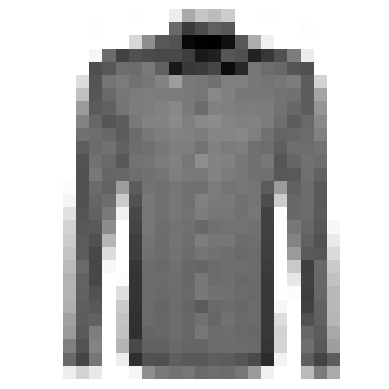

In [11]:
plt.imshow(X_train[15], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [12]:
y_train[15]

6

Here are the corresponding class names:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[15]]

'Shirt'

Let's take a look at a sample of the images in the dataset:

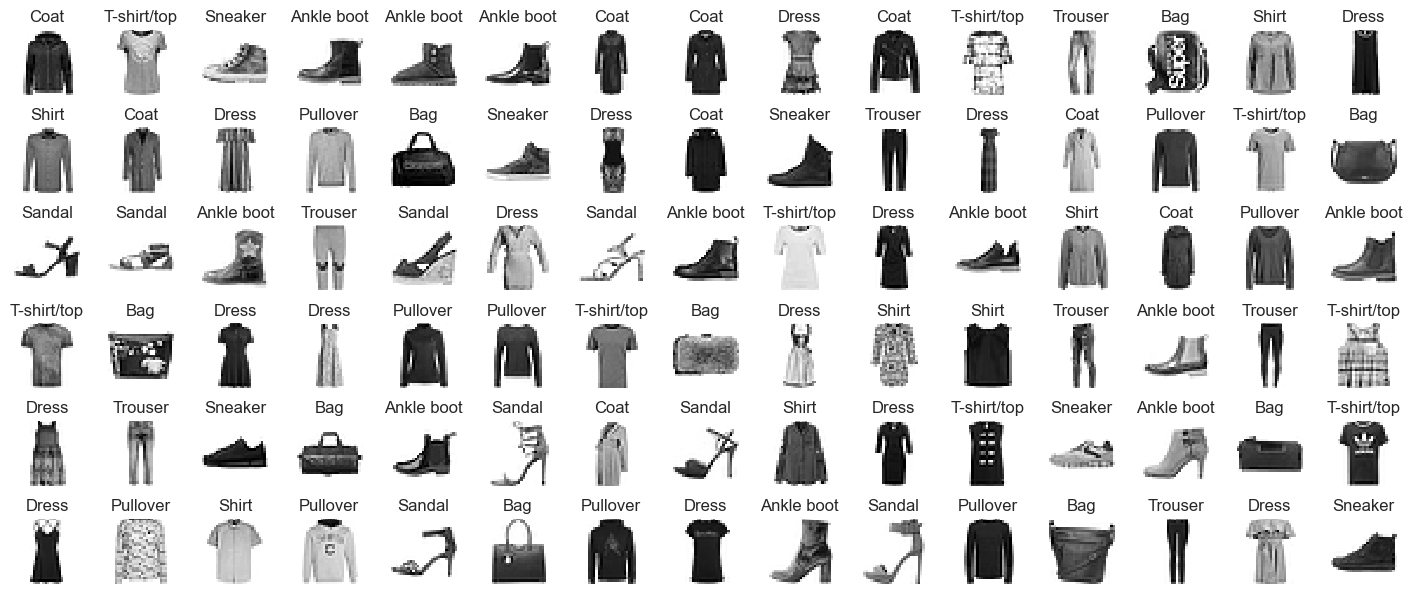

In [15]:
n_rows = 6
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Tensorflow model

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [20]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[-0.04184351,  0.01169072, -0.04826991, ..., -0.00613324,
        -0.01193332, -0.06100179],
       [-0.01960551,  0.05176449, -0.06776665, ..., -0.01834976,
        -0.04364997, -0.01164932],
       [-0.00331769,  0.05930641, -0.06784729, ...,  0.0183016 ,
        -0.03646749,  0.0296598 ],
       ...,
       [ 0.008036  ,  0.00307718,  0.03134587, ..., -0.00302833,
        -0.03966479, -0.02058372],
       [-0.03134451, -0.07215197,  0.03862242, ..., -0.00011904,
         0.0016093 ,  0.03230145],
       [-0.06799253, -0.06808322,  0.01742799, ...,  0.06497905,
        -0.051573  , -0.04478445]], dtype=float32)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

## Using GPU and CPU

Useful link: [Stackoverflow (2020-08-16) - How to run a model.fit properly on GPU? (unexptected behaviour)](https://stackoverflow.com/questions/63441288/how-to-run-a-model-fit-properly-on-gpu-unexptected-behaviour)

In [42]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.config.get_visible_devices())

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [41]:
with tf.device("/gpu:0"):
    model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.3599 - val_sparse_categorical_accuracy: 0.8886
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.3677 - val_sparse_categorical_accuracy: 0.8907
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8837
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.3628 - val_sparse_categorical_accuracy: 0.8934
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.3626 - val_sparse_categorical_accuracy: 0.8910
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0886 - spars

In [40]:
with tf.device("/cpu:0"):
    model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9610 - val_loss: 0.3416 - val_sparse_categorical_accuracy: 0.8910
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1144 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.3461 - val_sparse_categorical_accuracy: 0.8916
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.9613 - val_loss: 0.3930 - val_sparse_categorical_accuracy: 0.8784
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9627 - val_loss: 0.3489 - val_sparse_categorical_accuracy: 0.8935
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.3456 - val_sparse_categorical_accuracy: 0.8905
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1064 - spars

Num GPUs Available:  1


### Visualizando treinamento

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Avaliando resultado

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[0:6]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[0:6]
y_new

In [ ]:
plt.figure(figsize=(7.2, 2.4))
plt.title('Previsão')
for index, image in enumerate(X_new):
    plt.subplot(1, 6, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
    plt.text(7, 35, class_names[y_new[index]], fontsize = 12)

plt.text(-80, 45, 'Classes')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()